# Newmark-Beta Method (Free Vibration)
### Import Necessary Packages & Functions

In [1]:
import numpy as np
from numpy import sqrt
from matplotlib import pyplot as plt
from numpy import append

### Set Variable Values for System

In [2]:
m = 50 #mass
k = 51.5 #stiffness
xi = 0.01 #damping ratio - use decimal not percentage
wn = sqrt(k/m)
c = xi*2*sqrt(m*k) # determine damping coef. from damping ratio
wd = wn*sqrt(1.0-xi**2.0)
##Newmark Beta Variables - Based on Linear Acceleration Method
gamma = 1/2
beta = 1/6 
T1=20 #duration of motion evaluation
dt=0.002 #time step
N=int(T1/dt) #total number of time points
t=np.arange(0.0,T1,dt) #generate time vector
f = np.zeros(N)
Df = np.zeros(N)

In [3]:
f0=0 # magnitude of force
u0=2 #initial displacement
v0=1 # initial velocity
a0=0
ui=u0
dudti=v0
dudt2i=a0
u = [u0]
dudt = [v0]
dudt2 = [a0]

In [4]:
Kbar = k + m/(beta*(dt**2)) + c*gamma/(beta*dt)
for i in range (1,N):
    DFbar = Df[i] + ((m/(2*beta)) + c*dt*(1-gamma/(2*beta)))*dudt2i + ((1/(beta*dt))*m+(gamma/beta)*c)*dudti
    Dui = DFbar/Kbar
    Ddudt2i = (1/(beta*dt*dt))*Dui - (1/(beta*dt))*dudti - (1/(2*beta))*dudt2i
    Ddudti = dudt2i*dt+gamma*dt*Ddudt2i  
    ui = Dui + ui
    dudti = Ddudti + dudti
    dudt2i = Ddudt2i + dudt2i
    u.append(ui)
    dudt.append(dudti)
    dudt2.append(dudt2i)

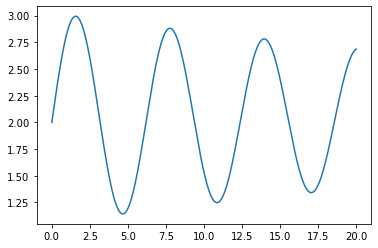

In [5]:
plt.plot(t,u)
plt.show()